# Sparks Foundation - Data Science and Business Analytics


# Task 1:Prediction using supervised ML
# Name: Rushikesh sonawane
# Batch :March 2022






This is simple linear regression task because it contains only two variables 

To predict:- A score of student if he studies for 9.25 hrs/ day

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

In [39]:
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)

In [40]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
df.head() # to know first 5 rows of table

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
df.tail() #to know last 5 rows of table

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [43]:
print(df.shape) #to know how much coumns and rows are in dataframe

(25, 2)


here it shows us 25 rows and 2 columns

In [44]:
print(df.info) # to get full details about dataframe

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>


In [45]:
df.isna().sum() # to know there are no null values

Hours     0
Scores    0
dtype: int64

In [46]:
df.describe() # to get statistical summary of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


so we can conclude there is non null value in dataset 

In [47]:
df.corr() #to know correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [48]:
# so here we get to know that correlation is postive between score and hours and value is 0.976191

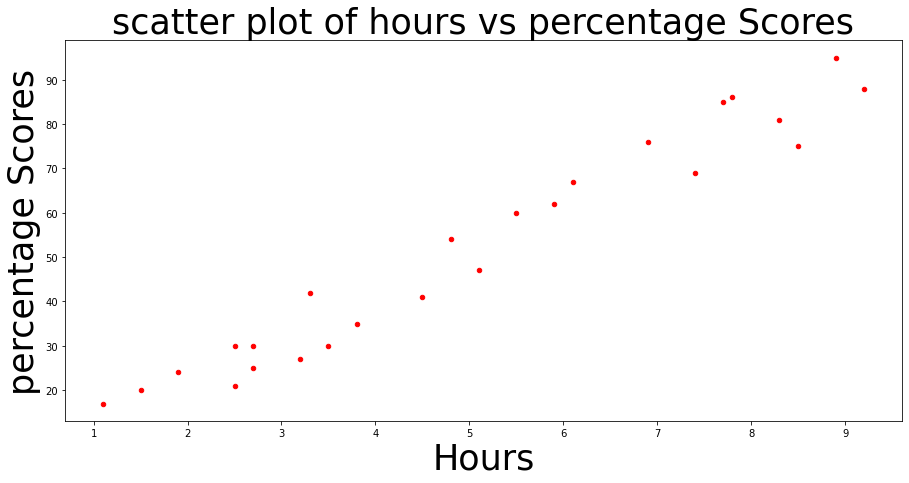

In [49]:
# to get scatter plot
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(15,7),color='r')
plt.title("scatter plot of hours vs percentage Scores",fontsize=35)
plt.xlabel("Hours",fontsize=35)
plt.ylabel("percentage Scores",fontsize=35)
plt.show()

In [50]:
x=df.iloc[:,:-1].values   #for hours
y=df.iloc[:,1].values      #for Score

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("training is completed")


training is completed


# now plotting regression line with data point

In [53]:
print("model intercept :",lr.intercept_)


model intercept : -1.5369573315500702


In [54]:
print("model coefficient: ",lr.coef_)

model coefficient:  [10.46110829]


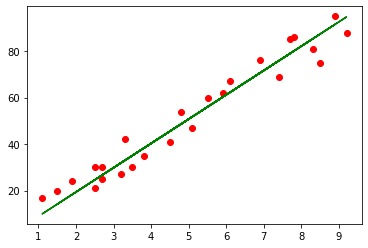

In [55]:
m=lr.coef_ #to plot regression line
c=lr.intercept_
y_line=m*x+c #mathematical equation of line 
plt.scatter(x,y,c='r')
plt.plot(x,y_line,c='g')
plt.show()

In [56]:
print(x_test)
prediction = lr.predict(x_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [57]:
h=[9.25]
s=lr.predict([h])

In [58]:
#accuracy of model 
lr.score(x_test,y_test)

0.8421031525243527

*so here from above we get accuracy (value*100) is 84%*

In [59]:
table = pd.DataFrame({'Actual' :y_test,'predicted':prediction})
table

,Actual,predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# so now turn to predict score when a student studies for 9.25 hours per day 

In [60]:
h=9.25
print("No of hours study:",h)
s=lr.predict([[h]])
print("score is: ",s)

No of hours study: 9.25
scoree is:  [95.22829438]


# model evaluation 

In [61]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
print("r^2 value is given by",metrics.r2_score(y_test,prediction))
print("mean absolute error",metrics.mean_absolute_error(y_test,prediction))

r^2 value is given by 0.8421031525243527
mean absolute error 7.882398086270432


# from above simple linear regression model we predicted that if student studies for 9.25 hours per day and predicted score comes out to be 95.22 % with mean absolute error is 7.88